In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
conn = sqlite3.connect('data/im.db')

In [27]:
#Here we can see the average rating of the genders WITH the highest Number of votes.
#The main reason to filter this way is to show people that not always the best rated movie is the one who have more votes
pd.read_sql("""
SELECT movie_basics.genres AS Category,movie_ratings.averagerating AS Rating,movie_ratings.numvotes as NumberVotes
  FROM movie_basics
  INNER JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
  WHERE movie_ratings.numvotes >= 650000 AND movie_ratings.averagerating >=8.2
  GROUP BY movie_basics.genres 
  ORDER BY Rating  DESC 
  ;
""", conn)

,Category,Rating,NumberVotes
0,"Action,Adventure,Sci-Fi",8.8,1841066
1,"Adventure,Drama,Sci-Fi",8.6,1299334
2,"Biography,Comedy,Drama",8.5,677343
3,"Drama,Western",8.4,1211405
4,"Action,Thriller",8.4,1387769
5,"Adventure,Animation,Comedy",8.3,682218
6,"Biography,Crime,Drama",8.2,1035358


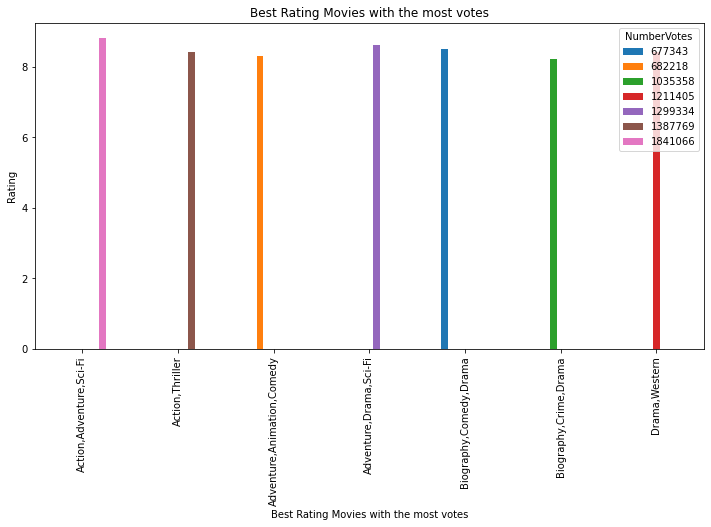

In [29]:
#Graphic
q= """
SELECT movie_basics.genres AS Category,movie_ratings.averagerating AS Rating,movie_ratings.numvotes as NumberVotes
  FROM movie_basics
  INNER JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
  WHERE movie_ratings.numvotes >= 650000 AND movie_ratings.averagerating >=8.2
  GROUP BY movie_basics.genres 
  ORDER BY Rating  DESC
;
"""
df=pd.read_sql(q, conn)
df.pivot(index='Category',columns='NumberVotes',values='Rating').plot(kind='bar',figsize=(12,6))
plt.xlabel('Best Rating Movies with the most votes')
plt.ylabel('Rating')
plt.title('Best Rating Movies with the most votes')
plt.show()


In [1]:
#I just helped my team-mate Miguel Cruz in the part of the query and the part of making his graphic of the query
#Code of the graphic:
#df=pd.read_sql(Director, conn)
# df.pivot(index='primary_title',columns='averagerating',values='averagerating').plot(kind='bar',figsize=(15,8))
#plt.figure(figsize=(15,8))
#plt.bar('primary_title', 'averagerating',data=df)
#plt.xlabel("Movie Title", size=15)
#plt.ylabel('Average Rating', size=15)
#plt.title("Director's movies", size=15)
#plt.show()

In [1]:
#I helped one person outside of our team, I helped Juan Varguez on making his query and how he can solved the problem
#of the query he was assigned to. The query only requires extra information like the use of the WHERE LIKE %example
#Also just helped with problems on the Kernel that only was to activate the learn-env